In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
TCS=pd.read_csv(r"C:\Users\Yogesh\OneDrive\Desktop\TCS\TCSNS.csv")
TCS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-08-2018,2068.000000,2085.00,2065.500000,2082.399902,1869.247314,2408020
1,31-08-2018,2082.300049,2092.00,2074.000000,2078.399902,1865.656982,2504554
2,03-09-2018,2084.800049,2090.00,2048.399902,2052.899902,1842.766846,1439711
3,04-09-2018,2059.800049,2104.75,2056.949951,2098.899902,1884.058350,4420803
4,05-09-2018,2100.000000,2107.25,2075.050049,2079.250000,1866.420166,1681106


In [5]:
TCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1234 non-null   float64
 2   High       1234 non-null   float64
 3   Low        1234 non-null   float64
 4   Close      1234 non-null   float64
 5   Adj Close  1234 non-null   float64
 6   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.6+ KB


In [6]:
TCS['Date']=pd.to_datetime(TCS['Date'])

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_11840\3383396065.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [7]:
print(f'Dataframe contains stock price between {TCS.Date.min()} {TCS.Date.max()}')
print(f'Toatl days={TCS.Date.max() - TCS.Date.min()} days')

Dataframe contains stock price between 2018-08-30 00:00:00 2023-08-29 00:00:00
Toatl days=1825 days 00:00:00 days


In [8]:
TCS.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1234,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03
mean,2021-03-03 22:44:08.946515456,2801.016814,2828.047360,2771.018119,2799.324837,2661.934629,2.857787e+06
min,2018-08-30 00:00:00,1559.699951,1685.449951,1506.050049,1636.349976,1534.814087,0.000000e+00
25%,2019-12-09 06:00:00,2135.000000,2158.412476,2108.575012,2132.337524,1959.842102,1.786778e+06
50%,2021-03-02 12:00:00,3068.550049,3099.000000,3035.000000,3064.875000,2917.897949,2.437963e+06
75%,2022-06-01 18:00:00,3329.000000,3358.000000,3301.837524,3329.162476,3249.805664,3.379008e+06
max,2023-08-29 00:00:00,4033.949951,4043.000000,3980.000000,4019.149902,3847.100098,1.983933e+07
std,NaN,648.480905,650.230748,646.046456,648.464385,673.549575,1.694099e+06


<Axes: >

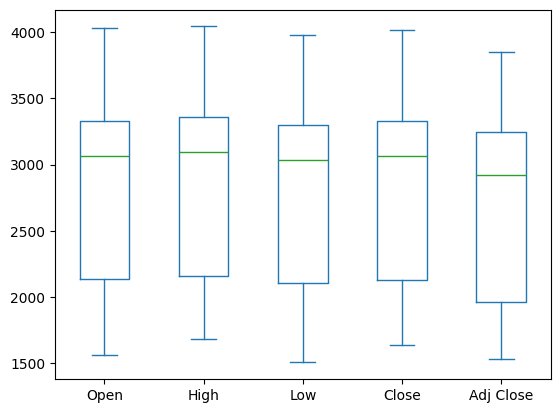

In [9]:
TCS[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [10]:
# setting the Layout for our plot
layout=go.Layout(
    title='Stock Price of TCS',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
TCS_data=[{'x':TCS['Date'], 'y':TCS['Close']}]
plot=go.Figure(data=TCS_data, layout=layout)

In [11]:
#Bulding the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
# split the data into train and test sets
x = np.array(TCS.index).reshape(-1,1)
y=TCS['Close']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [13]:
# Feature scaling
scaling = StandardScaler().fit(x_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# creating a linear model
lm = LinearRegression()
model=lm.fit(x_train,y_train)

In [16]:
# plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = x_train.T[0],
    y = y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = x_train.T[0],
    y = lm.predict(x_train).T,
    mode = 'lines',
    name = 'predicted'
)
TCS = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=TCS, layout=layout)

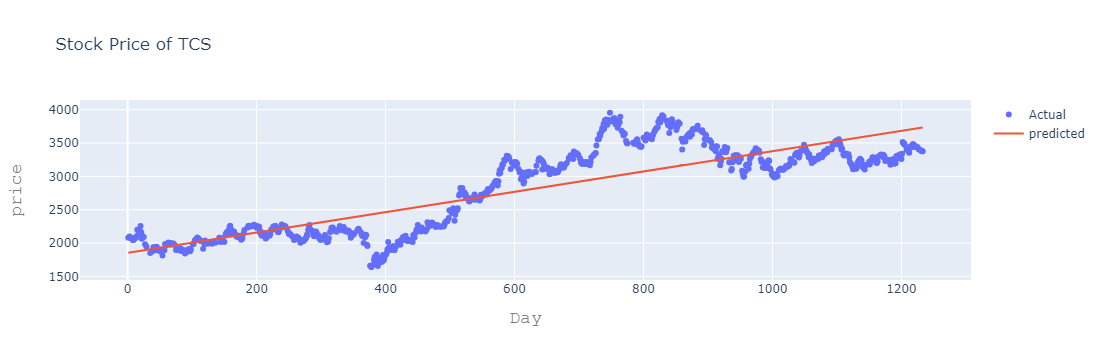

In [17]:
iplot(plot2)

In [22]:
y_pred = model.predict(x_test)
y_pred

array([3663.63397565, 2099.43297966, 2972.33343791, 1855.26501931,
       3042.53172651, 2285.61104943, 3103.5737166 , 2828.8847612 ,
       2026.18259155, 3202.76695049, 2992.17208469, 3225.65769677,
       2149.79262148, 1984.97924825, 2053.65148709, 3205.81904999,
       3329.42907992, 3649.89952788, 1901.04651188, 2076.54223338,
       2642.70669144, 2108.58927817, 2763.26462186, 3044.05777626,
       2822.78056219, 2873.14020402, 3720.09781648, 3121.88631362,
       2061.28173585, 2711.37893028, 3274.49128884, 2003.29184527,
       2596.92519887, 2920.44774633, 2314.60599472, 2741.89992533,
       2409.22107935, 2067.38593486, 2717.48312929, 2569.45630333,
       2537.40925854, 2018.55234279, 2943.33849262, 2125.37582545,
       3375.21057248, 3424.04416455, 3076.10482106, 3492.7164034 ,
       3694.15497069, 3707.88941846, 2554.19580581, 2680.85793524,
       3396.57526901, 2091.8027309 , 1891.89021336, 2552.66975606,
       2259.66820364, 3124.93841313, 2302.3975967 , 2403.11688

In [23]:
df = pd.DataFrame({"Actual Value" : y_test, "Predicted Value": y_pred, "Difference between Actual & Predicted" : abs(y_pred - y_test)})
df

,Actual Value,Predicted Value,Difference between Actual & Predicted
1187,3238.500000,3663.633976,425.133976
162,2157.850098,2099.432980,58.417118
734,3659.000000,2972.333438,686.666562
2,2052.899902,1855.265019,197.634883
780,3476.399902,3042.531727,433.868175
...,...,...,...
509,2426.300049,2628.972244,202.672195
138,1982.650024,2062.807786,80.157762
298,2081.500000,2306.975746,225.475746
62,2010.849976,1946.828004,64.021972


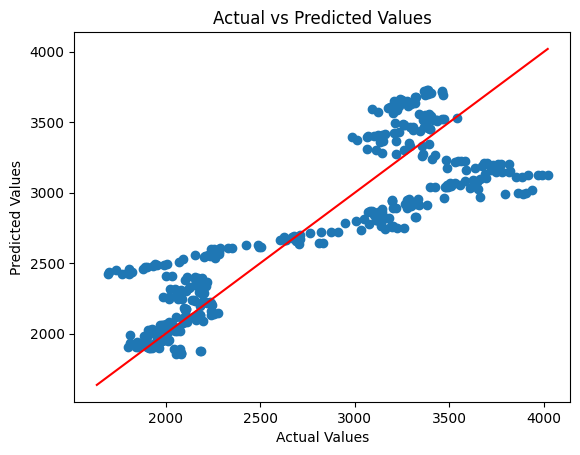

In [24]:
plt.scatter(y_test, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], '-', color='red')  # Plotting the best-fit line

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

In [25]:
# calculate score for model evaluation
score = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
{'MAE'.ljust(10)}{mae(y_train, lm.predict(x_train))}\t{mae(y_test, lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))}
'''
print(score)


Metric           Train                Test        
r2_score  0.7117145558895046	0.743049413278144
MAE       274.4061791305504	266.9191074927239
MSE       118422.37373368411	112963.60060957454

